In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('data/data/driving_log.csv') as csvfile:
    frames = np.array(list(csv.reader(csvfile)))

print(frames.shape)
print(frames[0])
print(frames[1])
print(frames.shape[0]/24/60)

(8037, 7)
['center' 'left' 'right' 'steering' 'throttle' 'brake' 'speed']
['IMG/center_2016_12_01_13_30_48_287.jpg'
 ' IMG/left_2016_12_01_13_30_48_287.jpg'
 ' IMG/right_2016_12_01_13_30_48_287.jpg' ' 0' ' 0' ' 0' ' 22.14829']
5.58125


In [3]:
crop = frames[1:,0:4]
print(crop.shape)
print(crop[0])
print(crop[1])

(8036, 4)
['IMG/center_2016_12_01_13_30_48_287.jpg'
 ' IMG/left_2016_12_01_13_30_48_287.jpg'
 ' IMG/right_2016_12_01_13_30_48_287.jpg' ' 0']
['IMG/center_2016_12_01_13_30_48_404.jpg'
 ' IMG/left_2016_12_01_13_30_48_404.jpg'
 ' IMG/right_2016_12_01_13_30_48_404.jpg' ' 0']


In [25]:
aMin = (2,[])
aMax = (-2,[])
aZero = (0,[])
for c in crop:
    angle = float(c[3])
    if (angle < aMin[0]):
        aMin = (angle, c)
    if (angle > aMax[0]):
        aMax = (angle, c)
    if ((angle == 0) and (len(aZero[1]) == 0)):
        aZero = (angle, c)

print(aMin, aMax, aZero)
        
stearingAngles = crop[:,3].astype(np.float)
stearingAnglesS = np.sort(stearingAngles)
stearingAnglesU = np.unique(stearingAnglesS)

print(stearingAngles.shape)
print(stearingAngles[0])
print(stearingAngles[1])
print(stearingAnglesU.shape)
print(stearingAnglesU[0])
print(stearingAnglesU[1])

zeroAt = np.where(stearingAnglesU==0)[0]

print(zeroAt)
print(stearingAnglesU[zeroAt - 1])
print(stearingAnglesU[zeroAt])
print(stearingAnglesU[zeroAt + 1])

(-0.9426954, array(['IMG/center_2016_12_01_13_39_28_024.jpg',
       ' IMG/left_2016_12_01_13_39_28_024.jpg',
       ' IMG/right_2016_12_01_13_39_28_024.jpg', ' -0.9426954'], 
      dtype='<U38')) (1.0, array(['IMG/center_2016_12_01_13_38_42_894.jpg',
       ' IMG/left_2016_12_01_13_38_42_894.jpg',
       ' IMG/right_2016_12_01_13_38_42_894.jpg', ' 1'], 
      dtype='<U38')) (0.0, array(['IMG/center_2016_12_01_13_30_48_287.jpg',
       ' IMG/left_2016_12_01_13_30_48_287.jpg',
       ' IMG/right_2016_12_01_13_30_48_287.jpg', ' 0'], 
      dtype='<U38'))
(8036,)
0.0
0.0
(124,)
-0.9426954
-0.9332381
[63]
[-0.00279104]
[ 0.]
[ 0.00434871]


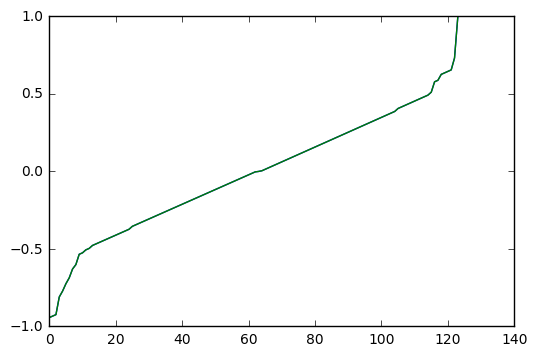

In [62]:
plt.plot(stearingAnglesU)
plt.show()

In [50]:
unique, counts = np.unique(stearingAnglesS, return_counts=True)

[-0.9426954  2.       ]
[-0.9332381  1.       ]


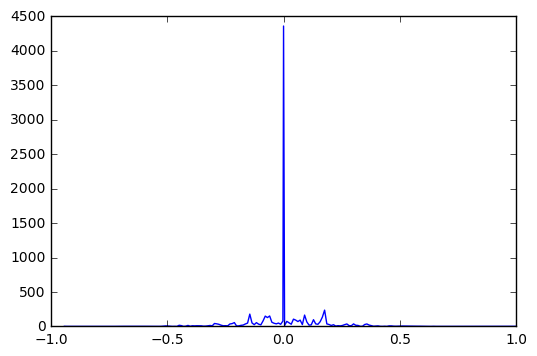

In [52]:
plt.plot(unique, counts)
plt.show()

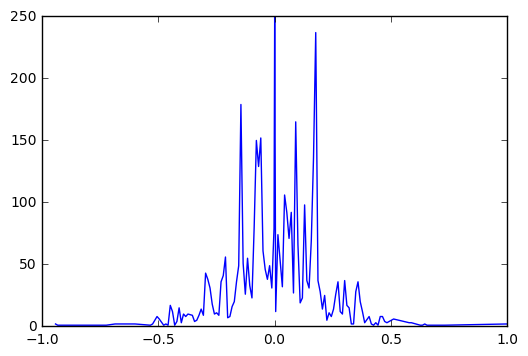

In [56]:
countsC = np.clip(counts,0,250)
plt.plot(unique, countsC)
plt.show()